# Subject: Data Science Foundation

## Session 9 - Data Exploration and Imputation

### Exercise 1 -  Data Exploration and Imputation for pandas Dataframe "Bike sharing"


## 1. Exploring The Variables

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv("C:/Users/francisco.sacramento/Desktop/Master_Big_Data_Phyton/6_Exercices/Data Science Foundations/Session_9_DSF/2_bike_sharing.csv")
df.head()



,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1/1/2011 0:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1/1/2011 1:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,1/1/2011 2:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,1/1/2011 3:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,1/1/2011 4:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [14]:
df.shape           # Check dimensions

(10886, 12)

In [15]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [16]:
print(df.head(5))  # Check the first 5 rows

        datetime  season  holiday  workingday  weather  temp   atemp  \
0  1/1/2011 0:00       1        0           0        1  9.84  14.395   
1  1/1/2011 1:00       1        0           0        1  9.02  13.635   
2  1/1/2011 2:00       1        0           0        1  9.02  13.635   
3  1/1/2011 3:00       1        0           0        1  9.84  14.395   
4  1/1/2011 4:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  


In [17]:
print( df.describe() )

             season       holiday    workingday       weather          temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10289.000000   
mean       2.506614      0.028569      0.680875      1.418427     20.357901   
std        1.116174      0.166599      0.466159      0.633839      7.617266   
min        1.000000      0.000000      0.000000      1.000000      0.820000   
25%        2.000000      0.000000      0.000000      1.000000     13.940000   
50%        3.000000      0.000000      1.000000      1.000000     20.500000   
75%        4.000000      0.000000      1.000000      2.000000     26.240000   
max        4.000000      1.000000      1.000000      4.000000     41.000000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537    

In [18]:
categorical = df.dtypes[df.dtypes == "object"].index
print(categorical)

df[categorical].describe()

Index(['datetime'], dtype='object')


,datetime
count,10886
unique,10886
top,4/9/2011 4:00
freq,1


## 2. Are there NA Values, Outliers or Other Strange Values? Explore the variable "temp".

In [19]:
df["temp"].describe()

count    10289.000000
mean        20.357901
std          7.617266
min          0.820000
25%         13.940000
50%         20.500000
75%         26.240000
max         41.000000
Name: temp, dtype: float64

In [20]:
missing = np.where(df["temp"].isnull() == True)
missing

(array([    6,    21,    38,    43,    46,    47,    48,    68,    69,
           70,    71,    83,    84,    85,    86,   133,   134,   135,
          136,   137,   138,   139,   140,   141,   142,   143,   144,
          145,   146,   147,   166,   167,   168,   169,   170,   171,
          172,   173,   174,   175,   176,   177,   178,   199,   200,
          201,   202,   203,   204,   205,   206,   207,   208,   209,
          226,   227,   228,   229,   230,   231,   232,   233,   234,
          235,   236,   268,   269,   270,   271,   272,   273,   274,
          275,   276,   277,   278,   279,   280,   281,   282,   283,
          284,   285,   286,   287,   288,   289,   290,   291,   292,
          293,   294,   295,   296,   297,   298,   299,   300,   301,
          302,   303,   304,   305,   306,   307,   308,   309,   310,
          311,   312,   313,   314,   315,   316,   317,   318,   319,
          320,   321,   322,   323,   324,   325,   326,   327,   328,
      

In [21]:
len(missing[0])

597

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000065F2630>]], dtype=object)

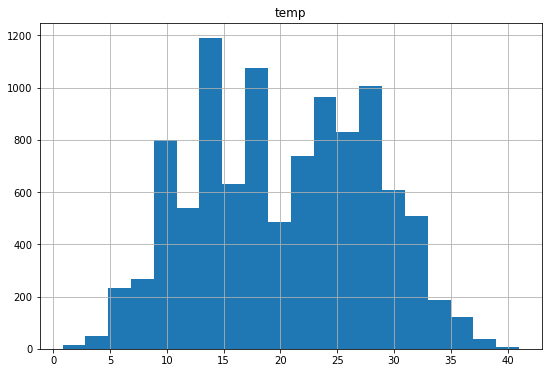

In [22]:
df.hist(column='temp',    # Column to plot
                   figsize=(9,6),   # Plot size
                   bins=20)         # Number of histogram bins

In [23]:
new_age_var = np.where(df["temp"].isnull(), # Logical check
                       20,                       # Value if check is true
                       df["temp"])     # Value if check is false

df["temp"] = new_age_var 

df["temp"].describe()

count    10886.000000
mean        20.338273
std          7.405880
min          0.820000
25%         14.760000
50%         20.000000
75%         26.240000
max         41.000000
Name: temp, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000009B06A20>]], dtype=object)

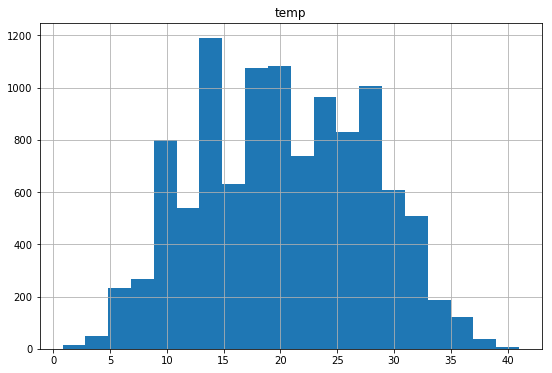

In [24]:
df.hist(column='temp',    # Column to plot
                   figsize=(9,6),   # Plot size
                   bins=20)         # Number of histogram bins